In [59]:
import tensorflow as tf
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.preprocessing
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.callbacks import EarlyStopping
from keras.layers import Dense,Dropout,SimpleRNN,LSTM,GRU
from keras.models import Sequential
from tensorflow import keras

In [77]:
df=pd.read_csv('KepRiau 2015 - 2022.csv')
df

,datetime,total_visitor,total_accomodation
0,1/1/2014,164430,10055
1,2/1/2014,137055,10079
2,3/1/2014,167030,10132
3,4/1/2014,151982,10190
4,5/1/2014,154299,10274
...,...,...,...
103,8/1/2022,79470,15449
104,9/1/2022,104652,15502
105,10/1/2022,106160,15525
106,11/1/2022,103940,15612


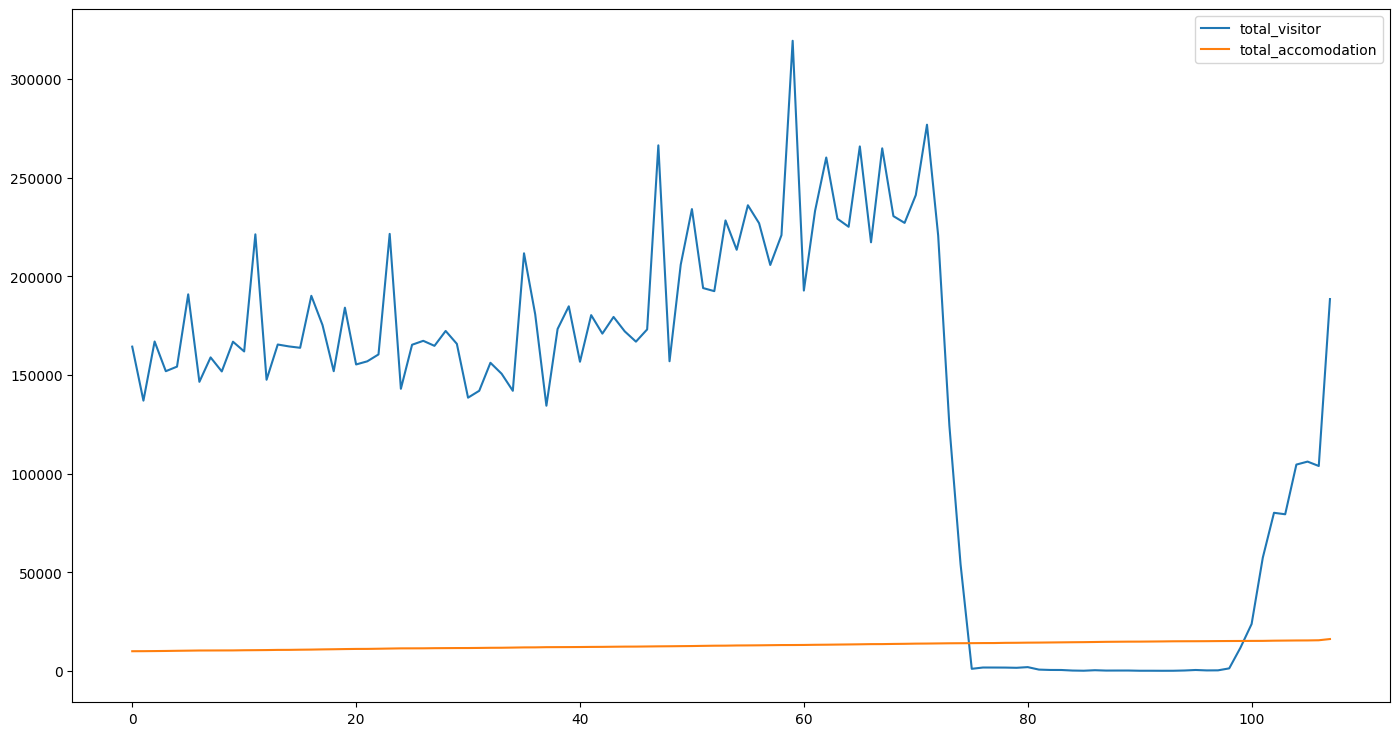

In [78]:
df.plot(figsize=(17, 9),legend=True)
plt.show()

In [79]:
data = df[['total_accomodation', 'total_visitor']].values

In [80]:
# Normalize the data using MinMaxScaler
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)
# Create sequences for time series forecasting
def create_sequences(data, n_steps):
    X, y = [], []
    for i in range(len(data) - n_steps):
        X.append(data[i:i+n_steps, :-1])
        y.append(data[i+n_steps, -1])
    return np.array(X), np.array(y)

TEST SIZE 80:20

In [47]:
# Choose the number of time steps
n_steps = 12

# Create sequences
X, y = create_sequences(data_scaled, n_steps)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [48]:
# Build the RNN model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [49]:
# Reshape the data for input to the LSTM
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1)



Epoch 1/100
3/3 [==============================] - 5s 408ms/step - loss: 0.2371 - val_loss: 0.1559
Epoch 2/100
3/3 [==============================] - 0s 78ms/step - loss: 0.2071 - val_loss: 0.1433
Epoch 3/100
3/3 [==============================] - 0s 59ms/step - loss: 0.1843 - val_loss: 0.1361
Epoch 4/100
3/3 [==============================] - 0s 42ms/step - loss: 0.1671 - val_loss: 0.1341
Epoch 5/100
3/3 [==============================] - 0s 30ms/step - loss: 0.1543 - val_loss: 0.1368
Epoch 6/100
3/3 [==============================] - 0s 51ms/step - loss: 0.1494 - val_loss: 0.1421
Epoch 7/100
3/3 [==============================] - 0s 76ms/step - loss: 0.1472 - val_loss: 0.1453
Epoch 8/100
3/3 [==============================] - 0s 95ms/step - loss: 0.1459 - val_loss: 0.1442
Epoch 9/100
3/3 [==============================] - 0s 41ms/step - loss: 0.1418 - val_loss: 0.1385
Epoch 10/100
3/3 [==============================] - 0s 42ms/step - loss: 0.1372 - val_loss: 0.1310
Epoch 11/100
3/3 [

In [50]:
# Evaluate the model
loss = model.evaluate(X_test, y_test, verbose=0)
print(f'Mean Squared Error on Test Data: {loss}')

Mean Squared Error on Test Data: 0.011842804029583931


In [51]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 50)                10400     
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 10451 (40.82 KB)
Trainable params: 10451 (40.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [53]:
prediction=model.predict(X_test)
score=r2_score(y_test, prediction)
print("r2:",score)

1/1 [==============================] - 0s 54ms/step
r2: 0.8369448535565991


In [56]:
def plotting_actual_vs_pred(y_test, y_pred, title):
    plt.figure(figsize=(16, 4))
    plt.plot(y_test, color='blue', label='Actual total_visitor')
    plt.plot(y_pred, color='orange',
    label='Predicted total_visitor')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Normalized total visitor')
    plt.legend()
    plt.show()

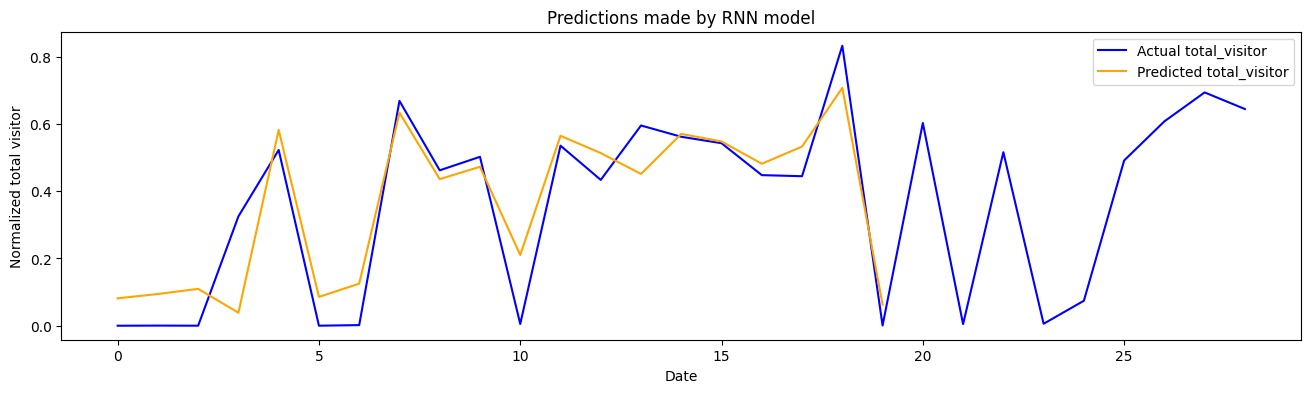

In [64]:
plotting_actual_vs_pred(y_test, prediction, "Predictions made by RNN model")

TEST SIZE 70:30

In [69]:
# Choose the number of time steps
n_steps = 12

# Create sequences
X, y = create_sequences(data_scaled, n_steps)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [70]:
# Build the RNN model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [71]:
# Reshape the data for input to the LSTM
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1)

Epoch 1/100
3/3 [==============================] - 3s 255ms/step - loss: 0.2547 - val_loss: 0.1772
Epoch 2/100
3/3 [==============================] - 0s 29ms/step - loss: 0.2290 - val_loss: 0.1621
Epoch 3/100
3/3 [==============================] - 0s 28ms/step - loss: 0.2059 - val_loss: 0.1484
Epoch 4/100
3/3 [==============================] - 0s 32ms/step - loss: 0.1843 - val_loss: 0.1380
Epoch 5/100
3/3 [==============================] - 0s 40ms/step - loss: 0.1673 - val_loss: 0.1319
Epoch 6/100
3/3 [==============================] - 0s 26ms/step - loss: 0.1513 - val_loss: 0.1301
Epoch 7/100
3/3 [==============================] - 0s 30ms/step - loss: 0.1424 - val_loss: 0.1316
Epoch 8/100
3/3 [==============================] - 0s 29ms/step - loss: 0.1384 - val_loss: 0.1359
Epoch 9/100
3/3 [==============================] - 0s 25ms/step - loss: 0.1369 - val_loss: 0.1404
Epoch 10/100
3/3 [==============================] - 0s 29ms/step - loss: 0.1369 - val_loss: 0.1416
Epoch 11/100
3/3 [

In [72]:
# Evaluate the model
loss = model.evaluate(X_test, y_test, verbose=0)
print(f'Mean Squared Error on Test Data: {loss}')

Mean Squared Error on Test Data: 0.019717952236533165


In [73]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 50)                10400     
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 10451 (40.82 KB)
Trainable params: 10451 (40.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [74]:
prediction=model.predict(X_test)
score=r2_score(y_test, prediction)
print("r2:",score)

1/1 [==============================] - 0s 319ms/step
r2: 0.733337841285949


In [75]:
def plotting_actual_vs_pred(y_test, y_pred, title):
    plt.figure(figsize=(16, 4))
    plt.plot(y_test, color='blue', label='Actual total_visitor')
    plt.plot(y_pred, color='orange',
    label='Predicted total_visitor')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Normalized total visitor')
    plt.legend()
    plt.show()

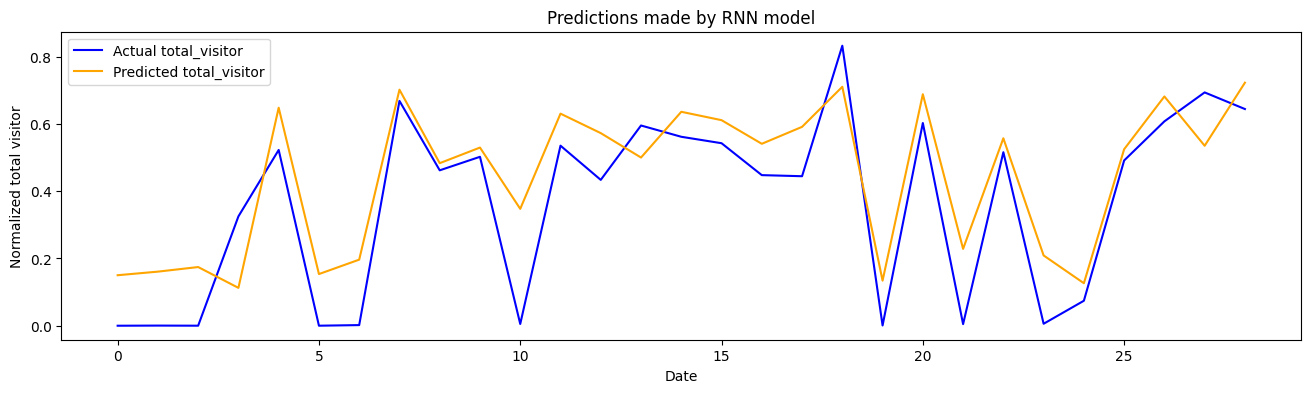

In [76]:
plotting_actual_vs_pred(y_test, prediction, "Predictions made by RNN model")

TEST SIZE 60:40

In [81]:
# Choose the number of time steps
n_steps = 12

# Create sequences
X, y = create_sequences(data_scaled, n_steps)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [82]:
# Build the RNN model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [83]:
# Reshape the data for input to the LSTM
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1)

Epoch 1/100
3/3 [==============================] - 3s 237ms/step - loss: 0.2433 - val_loss: 0.1725
Epoch 2/100
3/3 [==============================] - 0s 51ms/step - loss: 0.2199 - val_loss: 0.1593
Epoch 3/100
3/3 [==============================] - 0s 45ms/step - loss: 0.2001 - val_loss: 0.1483
Epoch 4/100
3/3 [==============================] - 0s 43ms/step - loss: 0.1831 - val_loss: 0.1400
Epoch 5/100
3/3 [==============================] - 0s 28ms/step - loss: 0.1677 - val_loss: 0.1343
Epoch 6/100
3/3 [==============================] - 0s 43ms/step - loss: 0.1543 - val_loss: 0.1315
Epoch 7/100
3/3 [==============================] - 0s 56ms/step - loss: 0.1454 - val_loss: 0.1321
Epoch 8/100
3/3 [==============================] - 0s 55ms/step - loss: 0.1401 - val_loss: 0.1351
Epoch 9/100
3/3 [==============================] - 0s 31ms/step - loss: 0.1369 - val_loss: 0.1349
Epoch 10/100
3/3 [==============================] - 0s 31ms/step - loss: 0.1342 - val_loss: 0.1307
Epoch 11/100
3/3 [

In [84]:
# Evaluate the model
loss = model.evaluate(X_test, y_test, verbose=0)
print(f'Mean Squared Error on Test Data: {loss}')

Mean Squared Error on Test Data: 0.014868228696286678


In [85]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 50)                10400     
                                                                 
 dense_4 (Dense)             (None, 1)                 51        
                                                                 
Total params: 10451 (40.82 KB)
Trainable params: 10451 (40.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [87]:
prediction=model.predict(X_test)
score=r2_score(y_test, prediction)
print("r2:",score)

1/1 [==============================] - 0s 48ms/step
r2: 0.7989246255862247


In [88]:
def plotting_actual_vs_pred(y_test, y_pred, title):
    plt.figure(figsize=(16, 4))
    plt.plot(y_test, color='blue', label='Actual total_visitor')
    plt.plot(y_pred, color='orange',
    label='Predicted total_visitor')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Normalized total visitor')
    plt.legend()
    plt.show()

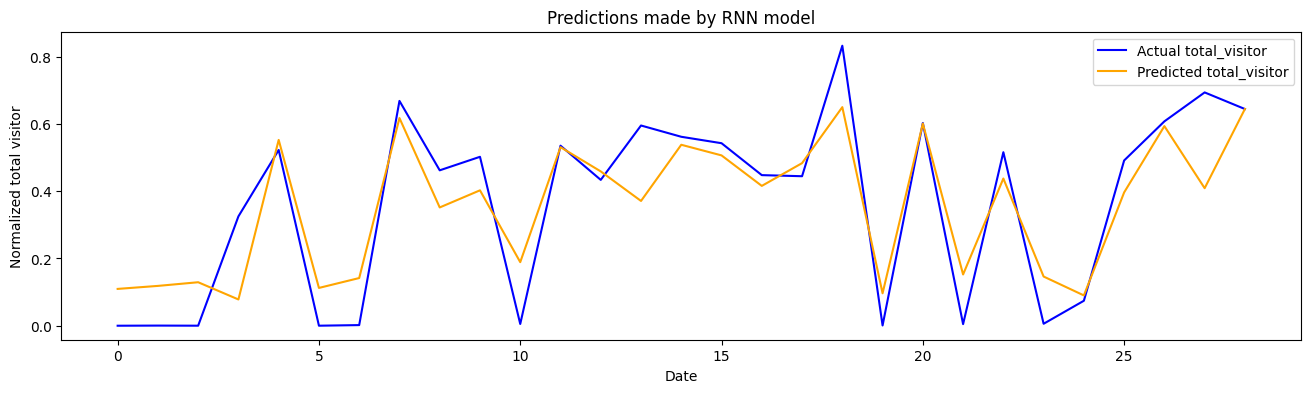

In [89]:
plotting_actual_vs_pred(y_test, prediction, "Predictions made by RNN model")